# installing needed packages.

In [3]:
! pip install tqdm

You should consider upgrading via the '/Users/maria/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 4.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
Note: you may need to restart the kernel to use updated packages.


In [1]:
! pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
You should consider upgrading via the '/Users/maria/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


# importing packages.

In [1]:
import numpy as np 
import pandas as pd
import cv2
import os
from tqdm import tqdm
import keras
from keras.models import save_model, load_model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense,Cropping2D,Activation,MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [14]:
# Load the TensorBoard notebook extension
log_dir="./logs"

In [2]:
import datetime

# loading data.

In [9]:
direc = './CK+48'
CATEGORIES = os.listdir(direc)

In [10]:
def load_data():
    DATADIR = direc
    data = []
    # loading training data
    for category in CATEGORIES:
        # create path to image of respective expression
        path = os.path.join(DATADIR, category)
        # get the classification  for each expression 
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), 0)
            data.append([img_array, class_num])
            
    return data

# defining train and test set.

In [11]:
data = load_data()
X = np.array([ x[0] for x in data])
y = np.array([Y[1] for Y in data])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50, shuffle = True)
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

100%|███████████████████████████████████████| 177/177 [00:00<00:00, 1977.68it/s]


In [ ]:
from glob import glob

angrypath = glob('./CK+48/anger/*.png')
happypath = glob('./CK+48/happy/*.png')
fearpath = glob('./CK+48/fear/*.png')
disgustpath = glob('./CK+48/disgust/*.png')
contemptpath = glob('./CK+48/contempt/*.png')
sadpath = glob('./CK+48/sadness/*.png')
surprisepath = glob('./CK+48/surprise/*.png')

In [ ]:
len(angrypath)

In [12]:
len(happypath)

207

In [13]:
len(fearpath)

75

In [14]:
len(disgustpath)

177

In [15]:
len(contemptpath)

54

In [16]:
len(sadpath)

84

In [17]:
len(surprisepath)

249

In [9]:
path = angrypath + happypath + fearpath + disgustpath + contemptpath + sadpath + surprisepath
len(path)

981

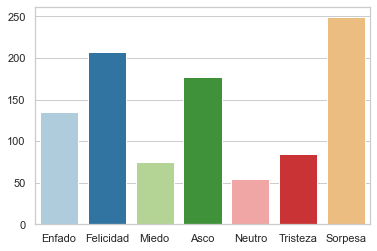

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
langs = ['Enfado', 'Felicidad', 'Miedo', 'Asco', 'Neutro', 'Tristeza', 'Sorpesa']
students = [len(angrypath), len(happypath), len(fearpath), len(disgustpath), len(contemptpath), len(sadpath), len(surprisepath)]
ax = sns.barplot(x=langs, y=students, palette = 'Paired')

In [35]:
df = pd.DataFrame(data=path,columns=['path'])

In [36]:
string = df['path'][0]
def emotion(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [38]:
df['emotion'] = df['path'].apply(emotion)
df.head()

,path,emotion
0,./CK+48/anger/S034_003_00000025.png,S034
1,./CK+48/anger/S111_006_00000009.png,S111
2,./CK+48/anger/S011_004_00000020.png,S011
3,./CK+48/anger/S011_004_00000021.png,S011
4,./CK+48/anger/S111_006_00000008.png,S111


<AxesSubplot:ylabel='emotion'>

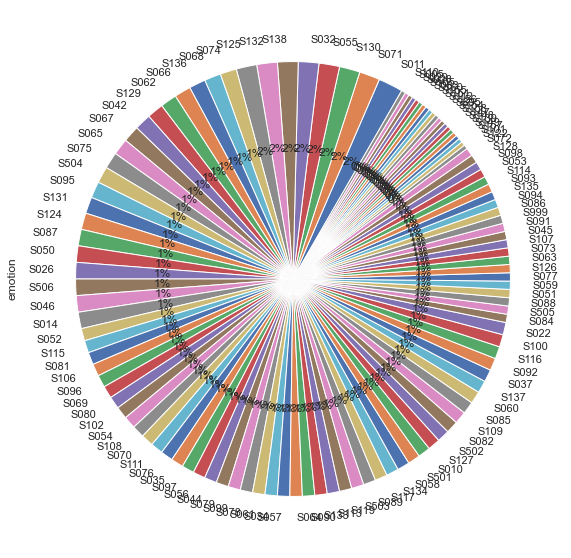

In [44]:
df['emotion'].value_counts().plot(kind='pie', autopct='%1.0f%%', 
                                      startangle=60, figsize=(10, 10))

In [29]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 KB 7.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pydot
import graphviz
import datetime
from tensorflow.keras.utils import plot_model

# CNN Model:

2022-04-22 19:06:10.708181: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-22 19:06:10.708211: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-04-22 19:06:10.711451: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 6)         156       
_________________________________________________________________
activation_4 (Activation)    (None, 48, 48, 6)         0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)       

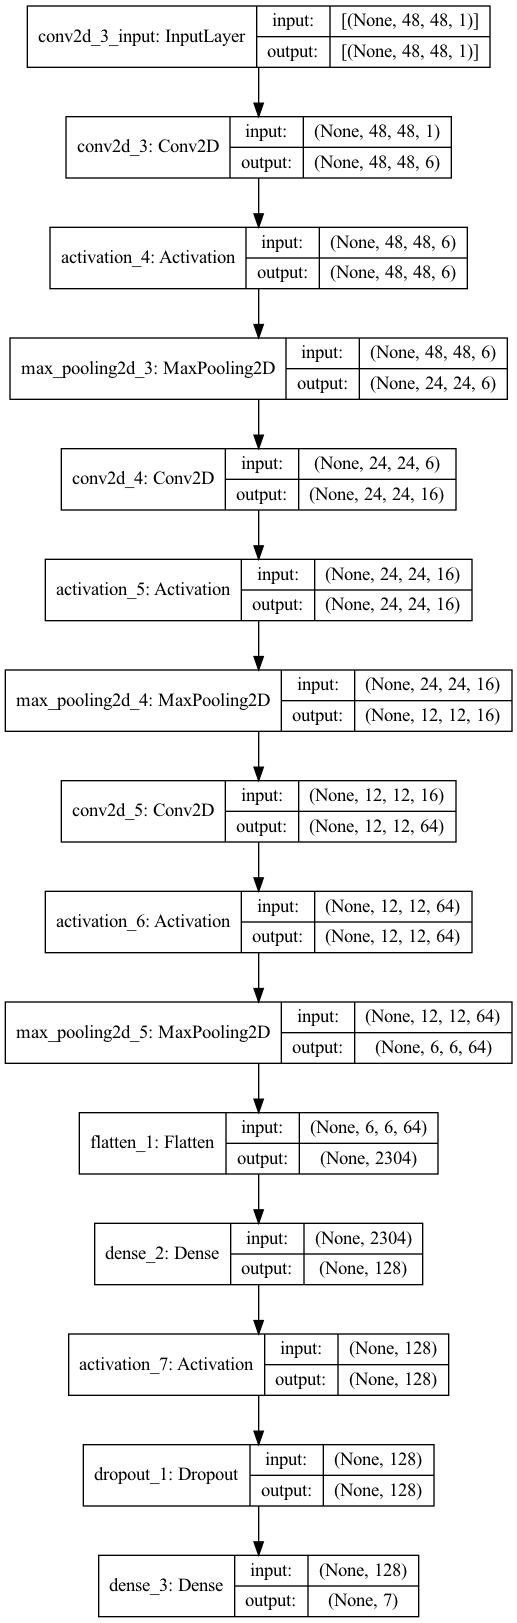

In [15]:
model = Sequential()

model.add(Conv2D(6, (5,5), padding='same', input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16,(5,5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc')
]

model.compile(loss='categorical_crossentropy', metrics=METRICS, optimizer='adam')

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.summary()

tf.keras.utils.plot_model(
     model,
     to_file="model.png",
     show_shapes=True,
     show_layer_names=True,
     rankdir="TB",
     expand_nested=True,
     dpi=96,
 )

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs

In [16]:
epochs = 35
hist = model.fit(X_train, y_train, batch_size=20 , epochs=35, validation_data = (X_test, y_test), callbacks=[tensorboard_callback])

2022-04-22 19:06:15.603493: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/35
 3/37 [=>............................] - ETA: 3s - loss: 1.8535 - accuracy: 0.2333 - precision: 0.5000 - recall: 0.0167 - auc: 0.6429        

2022-04-22 19:06:17.296643: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-04-22 19:06:17.296664: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-04-22 19:06:17.351482: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-04-22 19:06:17.376714: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-04-22 19:06:17.399282: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2022_04_22_19_06_17

2022-04-22 19:06:17.403505: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./logs/train/plugins/profile/2022_04_22_19_06_17/MacBook-Air-de-Maria.local.trace.json.gz
2022-04-22 19:06:17.423478: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./logs/train/plugins/profile/2022_04_22_19_06_17

2022-04-2

37/37 [==============================] - 4s 81ms/step - loss: 1.8707 - accuracy: 0.2286 - precision: 0.1250 - recall: 0.0014 - auc: 0.6338 - val_loss: 1.7830 - val_accuracy: 0.2846 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6925
Epoch 2/35
37/37 [==============================] - 2s 42ms/step - loss: 1.7592 - accuracy: 0.3333 - precision: 0.8824 - recall: 0.0204 - auc: 0.6954 - val_loss: 1.5855 - val_accuracy: 0.5285 - val_precision: 1.0000 - val_recall: 0.0488 - val_auc: 0.7795
Epoch 3/35
37/37 [==============================] - 2s 42ms/step - loss: 1.3852 - accuracy: 0.4966 - precision: 0.8706 - recall: 0.2381 - auc: 0.8241 - val_loss: 1.1151 - val_accuracy: 0.6260 - val_precision: 0.9886 - val_recall: 0.3537 - val_auc: 0.9199
Epoch 4/35
37/37 [==============================] - 2s 55ms/step - loss: 1.0849 - accuracy: 0.6122 - precision: 0.8846 - recall: 0.4381 - auc: 0.8982 - val_loss: 0.9198 - val_accuracy: 0.6911 - val_precision: 0.9643 - val_recall: 0.4390 -

37/37 [==============================] - 2s 47ms/step - loss: 0.0911 - accuracy: 0.9687 - precision: 0.9738 - recall: 0.9592 - auc: 0.9993 - val_loss: 0.0758 - val_accuracy: 0.9837 - val_precision: 0.9877 - val_recall: 0.9756 - val_auc: 0.9994
Epoch 34/35
37/37 [==============================] - 2s 49ms/step - loss: 0.0623 - accuracy: 0.9810 - precision: 0.9876 - recall: 0.9782 - auc: 0.9989 - val_loss: 0.0558 - val_accuracy: 0.9715 - val_precision: 0.9835 - val_recall: 0.9715 - val_auc: 0.9997
Epoch 35/35
37/37 [==============================] - 2s 46ms/step - loss: 0.0961 - accuracy: 0.9660 - precision: 0.9724 - recall: 0.9578 - auc: 0.9992 - val_loss: 0.0869 - val_accuracy: 0.9593 - val_precision: 0.9631 - val_recall: 0.9553 - val_auc: 0.9993


# final accuracy of the model = 99-100 %

In [17]:
model.save_weights('./CK+_model_weights.h5')
model.save_model('/tmp/model')

AttributeError: 'Sequential' object has no attribute 'save_model'

# plotting metrics.

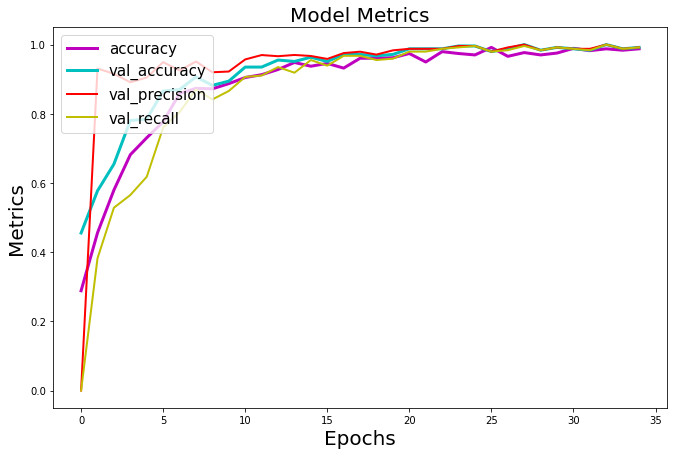

In [13]:
import matplotlib.pyplot as plt
import matplotlib
plt.figure(figsize=(11,7))
plt.plot(hist.history['accuracy'], color='m', linewidth=3.0)
plt.plot(hist.history['val_accuracy'], color='c',linewidth=3.0 )
plt.plot(hist.history['val_precision'], color='r',linewidth=2.0 )
plt.plot(hist.history['val_recall'], color='y',linewidth=2.0 )
plt.title('Model Metrics',fontsize = 20 )
plt.ylabel('Metrics',fontsize = 20)
plt.xlabel('Epochs',fontsize = 20)
plt.legend(['accuracy', 'val_accuracy','val_precision','val_recall'], loc='upper left',fontsize = 15)
plt.show()

# confusion matrix:

In [14]:
y_pred = model.predict(X_test)
labels = ['angry','neutral','disgust','fear','happy','sad','surprise']
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(tf.argmax(y_test, axis = 1), tf.argmax(y_pred, axis = 1))

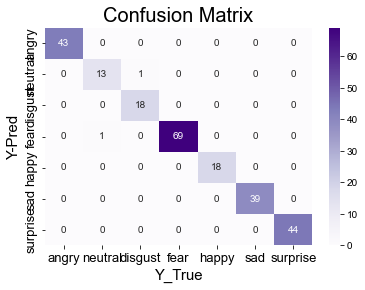

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
DetaFrame_cm = pd.DataFrame(cm_train, range(7), range(7))
p = sns.heatmap(DetaFrame_cm , cmap='Purples', annot=True)
p.set_title("Confusion Matrix",fontsize = 20)
sns.set(rc = {'figure.figsize':(8,7)})
sns.set(font_scale = 1)
p.set_yticklabels(labels, size = 13)
p.set_xticklabels(labels, size = 13)
p.set_xlabel("Y_True", fontsize = 15)
p.set_ylabel("Y-Pred", fontsize = 15)
plt.show()

# emotion recognetion trough webcam:

In [ ]:
emotion =  ['Anger', 'Neutral' ,'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']

model = keras.models.load_model("./CK+_model.h5")
font = cv2.FONT_HERSHEY_SIMPLEX
cam = cv2.VideoCapture(0)
face_cas = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_default.xml')

while True:
    ret, frame = cam.read()
    
    if ret==True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #gray = cv2.flip(gray,1)
        faces = face_cas.detectMultiScale(gray, 1.3,5)
        
        for (x, y, w, h) in faces:
            face_component = gray[y:y+h, x:x+w]
            fc = cv2.resize(face_component, (48, 48))
            inp = np.reshape(fc,(1,48,48,1)).astype(np.float32)
            inp = inp/255.
            prediction = model.predict(inp)
            em = emotion[np.argmax(prediction)]
            score = np.max(prediction)
            cv2.putText(frame, em+"  "+str(score*100)+'%', (x, y), font, 1, (0, 255, 0), 2)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        cv2.imshow("image", frame)
        
        if cv2.waitKey(1) == 27:
            break
    else:
        print ('Error')

cam.release()
cv2.destroyAllWindows()

2022-04-18 19:48:19.757606: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-18 19:48:21.867738: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
